# Mohamed Anwar Abouabdallah
# Analyse Numerique II : Julia  
                        
  # Tp 1 :

## Introduction :

Le but de ce TP est de mettre en évidence le comportement de certaines méthodes de résolution
de systémes linèaires pour une matrice de type discrétisation différence finie d'un laplacien en
dimension 1,2 et 3 avec conditions aux limites de type Dirichlet homogéne.
$$ \left\{ \begin{array}{c} - \Delta u(x)=f(x),  x \in \Omega  \\ u(0) \text{ sur 
$\partial{\Omega} $}
\end{array} \right.$$




## Question 1 :

# Laplace 1d
Le laplacien en dimension 1:

$$ \left\{ \begin{array}{c} -u''(x)=f(x), x\in]0,1[ \\ u(0)=u(1)=0
\end{array} \right.$$

On se donne une grille sur $]0,1[$, on se donne $x_0,x_1,...,x_{n+1}$ tel que $h=x_{i+1}-x_i, i=0,...,n$, grille uniforme.

On pose $u_i\approx u(x_i)$ et on obtient le système 
$$\left\{ \begin{array}{c}
-\frac{u_{i+1}-2u_i+u_{i+1}}{h^2}=f(x_i), i=1,...,n \\
u_0=u_{n+1}=0
\end{array} \right.$$

${\Leftrightarrow \frac{1}{h^2} \left( \begin{array}{cccc} 2 & -1 &  & 0 \\
-1 & \ddots & \ddots & \vdots \\
\vdots \\
&&&-1 \\
0 &  & -1 & 2
\end{array} \right) \left( \begin{array}{c} u_1 \\ \vdots \\ u_n \end{array} \right) = \left( \begin{array}{c} f(x_1) \\ \vdots \\ f(x_n) \end{array} \right)
} \Leftrightarrow A_{1d}u=F$

$A_{1d}$ symétrique, définie positive tridiagonale.





In [7]:
function Laplace1d(n)
    h=1./(n+1)
    d1=fill(-1/h^2,n-1);
    d2=fill(2/h^2,n);
    spdiagm((d1,d2,d1),(1,0,1)); 
end

Laplace1d (generic function with 1 method)

On va utiliser la fonction fill who create an array filled with the value x

In [8]:
#B= A + 2*eye(n,n) +C
 #   B=B*h

In [9]:
n=3
h=(1./(n+1)) #1. pour la virgule flottante
b=h^2
A=fill(-1./b,n);
B=fill(2./b,n);
Matrice=spdiagm((A,B,A),(-1,0,1));



In [6]:
function Laplace1d(n)
    h=(1./(n+1)) #1. pour la virgule flottante
    b=h^2
    A=fill(-1./b,n-1);
    B=fill(2./b,n);
    Matrice=spdiagm((A,B,A),(-1,0,1));
    return (Matrice)
    
end




Laplace1d (generic function with 1 method)

In [7]:
Mat1d=Laplace1d(4)



4×4 SparseMatrixCSC{Float64,Int64} with 10 stored entries:
  [1, 1]  =  50.0
  [2, 1]  =  -25.0
  [1, 2]  =  -25.0
  [2, 2]  =  50.0
  [3, 2]  =  -25.0
  [2, 3]  =  -25.0
  [3, 3]  =  50.0
  [4, 3]  =  -25.0
  [3, 4]  =  -25.0
  [4, 4]  =  50.0

In [8]:
full(Mat1d)

4×4 Array{Float64,2}:
  50.0  -25.0    0.0    0.0
 -25.0   50.0  -25.0    0.0
   0.0  -25.0   50.0  -25.0
   0.0    0.0  -25.0   50.0



# Le laplacien 2d


Ici on va passer au laplacien en 2d de notre fonction :
## On va créer cette matrice :
$$ \left\{ \begin{array}{c} - \Delta u(x)=f(x), x\in]0,1[^2 \\ u(0) \text{ sur le bord}
\end{array} \right.$$

$$ \Delta u(x)= \frac{\partial^2u}{\partial x_1 ^2} + \frac{\partial^2 u}{\partial x_2^2}$$

On se donne une grille bidimensionnelle uniforme en $x_1$ et $x_2$ avec $h=\frac{1}{n+1}$

Les points $\{x_i\}, i=1,...,n^2$ sont les nœuds de la grille intérieur numérotés lexicographiquement.

$$ \frac{\partial^2 u}{\partial x^2} \approx \frac{u(x_{i+1}-2u(x_i)+u(x_{i-1)}}{h^2} $$
$$ \frac{\partial^2 u}{\partial y^2} \approx \frac{u(x_{i+n}-2u(x_i)+u(x_{i-n)}}{h^2} $$

ce qui donne le système suivant 
%
%$$
%\left(
%\begin{array}{cccc|cccc|cccc|cccc|cccc}
%4 & -1 &&0& -1&&&0& &&&&&&&&\\
%-1&\ddots&\ddots&&&\ddots&&0&&&&&&&&\\
%&\ddots&\ddots&-1&&&\ddots&&&&&&&&&&\\
%&&-1&4&&&&-1&&&&&&&&&\\
%\hline
%-1&&&0&4&-1&&0&\ddots&&&&&&&&\\
%&\ddots&&&-1&\ddots&\ddots&0&&\ddots&&&&&&&&\\
%&&\ddots&0&&\ddots&\ddots&-1&&&&\ddots&&&&&\\
%&&0&-1&&&-1&4&&&\ddots&&&&&&\\
%\hline
%&&&&-1&&&0&&&\ddots&&&&&&&&\\
%&&&&&\ddots&&0&&&\ddots&&&&&\\
%&&&&&&\ddots&0&&\ddots&&&\ddots&&&&&\\
%&&&&&&0&-1&\ddots&&&&\ddots&&&&&\\
%\hline
%&&&&&&&&&&&\ddots&&-1&&0\\
%&&&&&&&&&&&&&0&\ddots&&\\
%&&&&&&&&&&&&&&&-1\\
%\hline
%&&&&&&&&&&&&&-1&&0&4&-1&&0\\
%&&&&&&&&&&&&&&\ddots&&-1&\ddots&\ddots\\
%&&&&&&&&&&&&&&&&&\ddots&\ddots&-1\\
%&&&&&&&&&&&&&&&&0&&-1&4
%\end{array}
%\right)
%\left(\begin{array}{c}
%u_1\\ \vdots\\ u_n \\ \hline \\ u_{n+1} \\ \vdots \\ u_{2n} \\ \hline u_{2n+1} \\ \vdots \\ u_{3n} \\ \hline \vdots \\ \hline \\ \vdots \\ u_{n^2} 
%\end{array}
%\right) = \left( \begin{array}{c}
%f(x_1) \\ \vdots \\ \\ \\ \\ \\ \\ \\ \vdots \\ f(x_{n^2})
%\end{array}  \right)
%$$



$A_{2d}$ est symétrique définie positive pentadiagonale ou tridiagonale blocs. De plus elle peut s'écrire sous la forme $A_{2d}=I_{d_x}\otimes A_{1d_x}+A_{1d_y}\otimes I_{d_y}$ (multiplication de Kronecker)

In [9]:

#cette fonction ne marche pas on va utiliser une deuxième methode

#function Laplace2dbis(n,m)
 #   h=(1./(n+1)*(m+1))
  #  b=h^2
   # A=fill(-1./b,n-1);
    #B=fill(4./b,n);
    #Matricelap1d=spdiagm((A,B,A),(-1,0,1));
    #secondterme=-1*speyes(n)
    #Matrice=spzeros(m, n)
    #Matrice=spdiagm((Matricelap1d,eyes())
    
    
#return Matrice

## Methode 2 :
 Notre matrice Laplace2d peut s'écrire sous la forme $A_{2d}=I_{d_x}\otimes A_{1d_x}+A_{1d_y}\otimes I_{d_y}$ (multiplication de Kronecker)
!! reg lin ac  linreg(x, y, w)

In [10]:
#faux
#function Laplace3d(n,m, p) 
#    Matrice3d=kron(speye(p),Laplace1d(n,m))+kron(Laplace1d(p),speye(n*m))
    
#end


function Laplace2d(n,m)
    B = kron(speye(m),Laplace1d(n))+kron(Laplace1d(m),speye(n))
end

Laplace2d (generic function with 1 method)

In [11]:
mat2d=Laplace2d(3,4)
full(mat2d)

12×12 Array{Float64,2}:
  82.0  -16.0    0.0  -25.0    0.0  …    0.0    0.0    0.0    0.0    0.0
 -16.0   82.0  -16.0    0.0  -25.0       0.0    0.0    0.0    0.0    0.0
   0.0  -16.0   82.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
 -25.0    0.0    0.0   82.0  -16.0       0.0    0.0    0.0    0.0    0.0
   0.0  -25.0    0.0  -16.0   82.0     -25.0    0.0    0.0    0.0    0.0
   0.0    0.0  -25.0    0.0  -16.0  …    0.0  -25.0    0.0    0.0    0.0
   0.0    0.0    0.0  -25.0    0.0     -16.0    0.0  -25.0    0.0    0.0
   0.0    0.0    0.0    0.0  -25.0      82.0  -16.0    0.0  -25.0    0.0
   0.0    0.0    0.0    0.0    0.0     -16.0   82.0    0.0    0.0  -25.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0   82.0  -16.0    0.0
   0.0    0.0    0.0    0.0    0.0  …  -25.0    0.0  -16.0   82.0  -16.0
   0.0    0.0    0.0    0.0    0.0       0.0  -25.0    0.0  -16.0   82.0

#Laplace 3d
$$ \left\{ \begin{array}{c} - \Delta u(x)=f(x), x\in]0,1[^3 \\ u(0) \text{ sur le bord}
\end{array} \right.$$

$$ \frac{\partial^2 u}{\partial x^2} \approx \frac{u(x_{i+1}-2u(x_i)+u(x_{i-1)}}{h^2} $$
$$ \frac{\partial^2 u}{\partial y^2} \approx \frac{u(x_{i+n}-2u(x_i)+u(x_{i-n)}}{h^2} $$
$$ \frac{\partial^2 u}{\partial z^2} \approx \frac{u(x_{i+n^2}-2u(x_i)+u(x_{i-n^2)}}{h^2} $$


$A_{3d}$ est symétrique, définie positive, heptadiagonale, pentadiagonale par blocs et s'écrit sous la forme
$$A_{3d}=
I_{d_2}\otimes I_{dy}\otimes A_{\Delta d_x} +
I_{dx}\otimes A_{\Delta d_z}\otimes I_{dx}
+ A_{\Delta d_2}\otimes I_{d_y} \otimes I_{d_x} $$



In [12]:
function Laplace3d(n,m,p)
    C = kron(speye(p),Laplace2d(n,m))+kron(Laplace1d(p),speye(n*m))
end

Laplace3d (generic function with 1 method)

In [13]:
mat3d=Laplace3d(3,4,5)
full(mat3d)

60×60 Array{Float64,2}:
 154.0  -16.0    0.0  -25.0    0.0  …    0.0    0.0    0.0    0.0    0.0
 -16.0  154.0  -16.0    0.0  -25.0       0.0    0.0    0.0    0.0    0.0
   0.0  -16.0  154.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
 -25.0    0.0    0.0  154.0  -16.0       0.0    0.0    0.0    0.0    0.0
   0.0  -25.0    0.0  -16.0  154.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0  -25.0    0.0  -16.0  …    0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0  -25.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0  -25.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0  …    0.0    0.0    0.0    0.0    0.0
   0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
 -36.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0
   ⋮                       

# Question 2

## Comparaison du temps d'assemblage en utilisant Ufmpack :


In [14]:
Pkg.add("PyPlot")


INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


Le but de cette question est de comparer le temps de résolution des système par rapport à la taille de la matrice des trois Laplace. Ainsi dans un premier temps je vais comparer pour les mêmes valeurs puis pour des valeurs aléatoires.



In [15]:
println("Laplace 1d");

N1=[125, 1000, 8000, 27000, 125000, 1000000]; 
c1=zeros(length(N1)); # On créer un vecteur dans lequel on stockera le temps de résolution du système

for i=1:length(N1)
    A=Laplace1d(N1[i]); 
    b=ones(N1[i])
    tic();
    A\b;
    c1[i]=toq();
end;



Laplace 1d


In [16]:
println("Laplace 2d");

N2=[25, 100, 400, 900, 2500, 10000]; # On choisit différentes tailles de matrice
c2=zeros(length(N2));# On créer un vecteur dans lequel on stockera le temps de résolution du système

for i=1:length(N2)
    A=Laplace2d(N2[i],N2[i]);#on applique notre fonction sur les différentes valeurs à tester
    b=ones(N2[i].^2); 
    tic();
    A\b;
    c2[i]=toq();
end;

Laplace 2d


LoadError: [91mOutOfMemoryError()[39m

In [17]:
println("Laplace 3d");

N3=[5,10,20,30,50]; # On choisit différentes tailles de matrice
c3=zeros(length(N3)); # On créer un vecteur dans lequel on stockera le temps de résolution du système

for i=1:length(N3)
    A=Laplace3d(N3[i],N3[i],N3[i]);
    b=ones(N3[i].^3);
    tic();
    A\b;
    c3[i]=toq();
end;


Laplace 3d


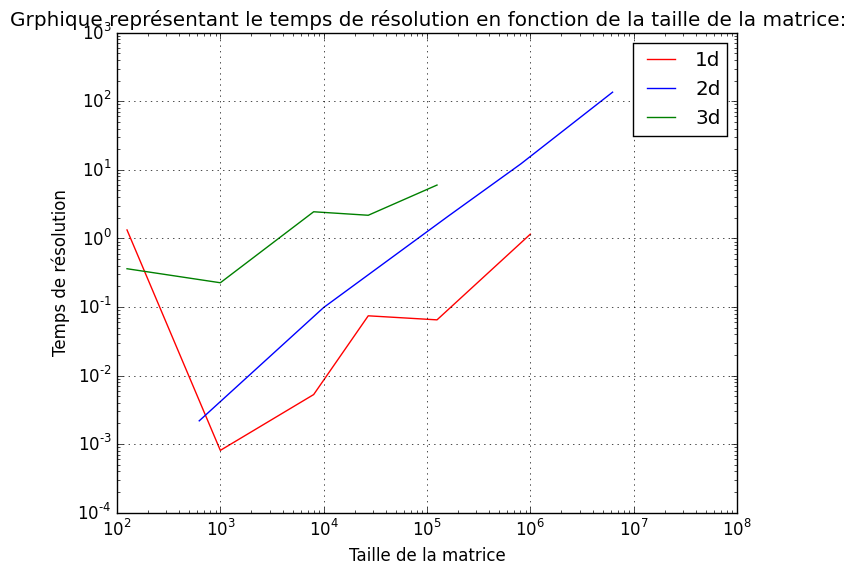

In [18]:
using PyPlot

xlabel("Taille de la matrice")
ylabel("Temps de résolution")
title("Grphique représentant le temps de résolution en fonction de la taille de la matrice: ")

loglog(N1,c1,color="red")
loglog(N2.^2,c2,color="blue")
loglog(N3.^3,c3,color="green")
legend(["1d" ; "2d" ;"3d"])
grid("on")


Pour des valeurs en logarithmique :

In [19]:
println("Laplace 1d");

N1=[100,1000,10000,100000,1000000,10000000]; # On choisit différentes tailles de matrice
c1=zeros(length(N1)); # On créer un vecteur dans lequel on stockera le temps de résolution du système

for i=1:length(N1)
    A=Laplace1d(N1[i]); 
    b=ones(N1[i])
    tic();
    A\b;
    c1[i]=toq();
end;


Laplace 1d


In [20]:
println("Laplace 2d");

N2=[10,100,1000,5000]; # On choisit différentes tailles de matrice
c2=zeros(length(N2));# On créer un vecteur dans lequel on stockera le temps de résolution du système

for i=1:length(N2)
    A=Laplace2d(N2[i],N2[i]);
    b=ones(N2[i].^2);
    tic();
    A\b;
    c2[i]=toq();
end;

Laplace 2d


LoadError: [91mOutOfMemoryError()[39m

In [21]:
println("Laplace 3d");

N3=[5,10,20,30,50]; # On choisit différentes tailles de matrice
c3=zeros(length(N3)); # On créer un vecteur dans lequel on stockera le temps de résolution du système

for i=1:length(N3)
    A=Laplace3d(N3[i],N3[i],N3[i]);
    b=ones(N3[i].^3);
    tic();
    A\b;
    c3[i]=toq();
end;

Laplace 3d


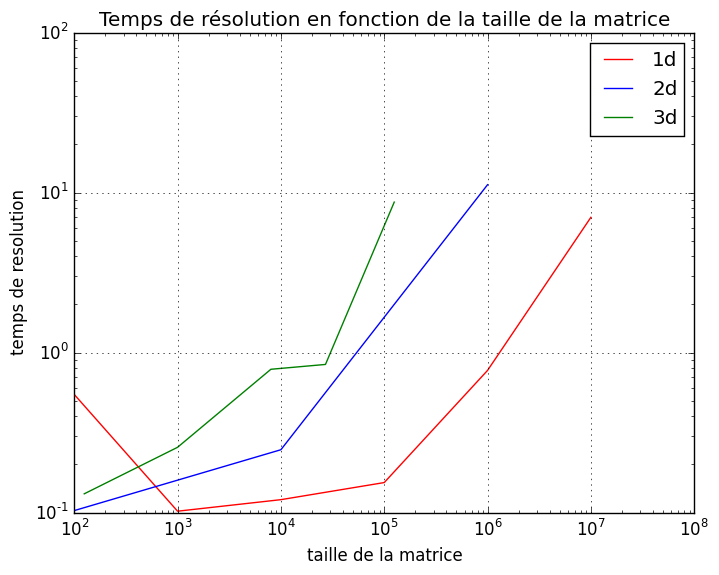

In [22]:
using PyPlot

xlabel("taille de la matrice")
ylabel("temps de resolution")
title("Temps de résolution en fonction de la taille de la matrice")

loglog(N1,c1,color="red")
loglog(N2.^2,c2,color="blue")
loglog(N3.^3,c3,color="green")
legend(["1d" ; "2d" ;"3d"])
grid("on")

## Interpretation :





# Question 3 :
Dans cette partie nous allons implementer la méthode du gradient conjugué sans conditionnement.


In [23]:
function GradConj(A,b,x0,epsilon)
    x=x0;
    r0=b-A*x;
    r=r0;
    d=r;
    residus=[norm(r)/norm(r0)];
    k=1;
    while ((norm(r)/norm(r0))>epsilon) 
        alpha=dot(r,d)/dot(d,A*d);
        x=x+alpha*d;
        r2=r;
        r=r-alpha*A*d;
        beta=dot(r,r)/dot(r2,r2);
        d=r+beta*d;
        k=k+1;
        push!(residus,(norm(r)/norm(r0)))
    end
    return x,residus
end


GradConj (generic function with 1 method)

In [24]:
#valeurs à tester :
A=[1 2 ; 2 1];
b=[1;3];

full(b)



2-element Array{Int64,1}:
 1
 3

In [25]:
full(A)


2×2 Array{Int64,2}:
 1  2
 2  1

In [26]:
x0=[1;1];
epsilon=10e-8;
G = GradConj(A,b,x0,epsilon)

([1.66667, -0.333333], [1.0, 2.0, 0.0])

# Question 4
## Preconditionnement SSOR :


On décompose la matrice A en sous partie et plus précisément $$ A = D - I - S $$ avec 
D : la diagonale de A , S : la matrice triangulaire supérieure de A et I : la partie inférieure de A
     
On créera la fonction d'initialisation qui nous donnera un assemblage de M similaire à celui vu en cour, ensuite on procéde à la résolution des systèmes triangulaires et enfin on va appliqué notre gradient conjugé comme dans l'exercie 1 du Td2. 


In [27]:
function init_Precond(w,A)
    global D,E,F
    Dw=diag(A)/w;
    D=spdiagm(Dw)/(2-w);
    E=triu(A,1)+spdiagm(Dw);
    F=tril(A,-1)+spdiagm(Dw);        
end



init_Precond (generic function with 1 method)

In [28]:
function Precond_SSOR(r)    
    global D,E,F
    r=F\r
    r=D\r
    r=E\r
end



Precond_SSOR (generic function with 1 method)

In [29]:
function GradConjPre(A,b,Precond_SSOR,x0,epsilon)
    x=x0;
    r0=b-A*x;
    r=r0;
    z=Precond_SSOR(r)
    d=copy(z);
    residus=[norm(r)/norm(r0)]
    k=1
    while ((norm(r)/norm(r0))>epsilon)
        alpha=dot(r,z)/dot(d,A*d);
        x=x+alpha*d;
        r2=r;
        r=r-alpha*A*d;
        z2=Precond_SSOR(r2);
        z=Precond_SSOR(r);
        beta=dot(z,r)/dot(z2,r2);
        d=z+beta*d;
        k=k+1
        push!(residus,(norm(r)/norm(r0)))
    end    
    return x,residus
end

GradConjPre (generic function with 1 method)

In [30]:
a=rand(1)
a=real(a)

1-element Array{Float64,1}:
 0.321486

Pour $\omega $ entre 1 et 2 :

In [31]:
w=1+0.49025;

init_Precond(w,A);
G=GradConjPre(A,b,Precond_SSOR,x0,epsilon)

([1.66667, -0.333333], [1.0, 15.3825, 1.85457e-14])

#  Evolution des résidus
--------------

L'objectif de la question est de pouvoir comparer l'évolution des résidus en fonction des itérations pour différentes matrices (1d, 2d et 3d) à des tailles fixées pour la méthode du gradient conjugué avec sans préconditionnement. Pour cela nous allons d'abord définir notre $w_{opt} $ de cette manière 
$$w_{opt} = \frac{2}{1+sin(\pi\times h)} $$
Ensuite comme pour la question 2 nous allons utiliser Ufmpack afin de tracer l'évolution du temps d'assemblage et des résidus

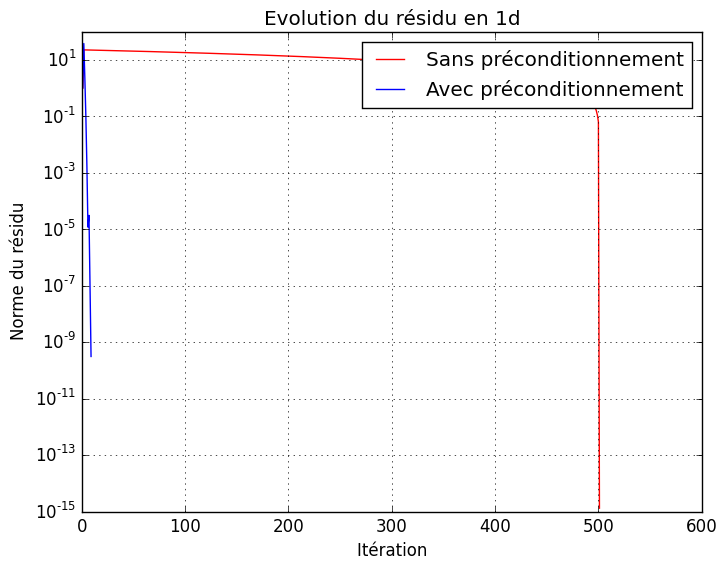

In [44]:

n=1000;
A=Laplace1d(n);
b=ones(n);
h=1/(n+1);
wopt=2/(1+sin(pi*h));

(x,res1)=GradConj(A,b,zeros(b),epsilon); # Sans préconditionnement
init_Precond(wopt,A)
(x,res2)=GradConjPre(A,b,Precond_SSOR,zeros(b),epsilon); # Avec préconditionnement




using PyPlot

f=figure()
xlabel("Itération ")
ylabel("Norme du résidu")
title("Evolution du résidu en 1d")
semilogy(1:length(res1),res1,color="red")
semilogy(1:length(res2),res2,color="blue")
legend(["Sans préconditionnement";"Avec préconditionnement"])
grid("on")

On va faire  ensuite la meme chose en 2 et 3 dimension :

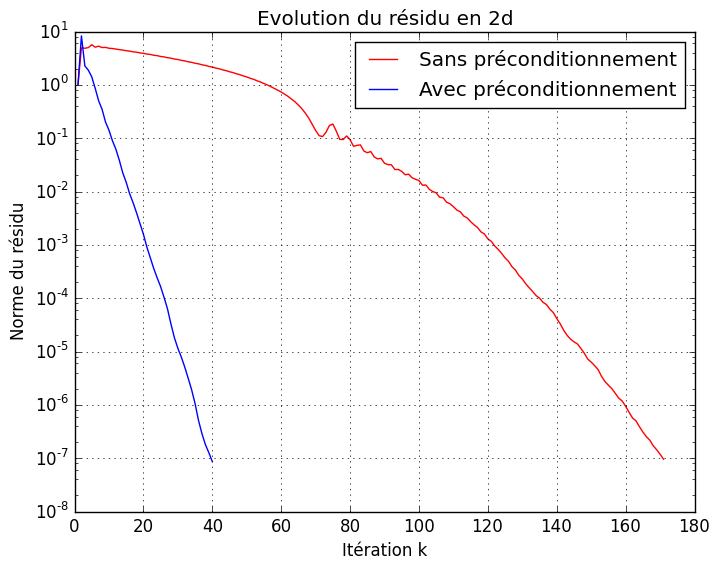

In [45]:
n=100;
A=Laplace2d(n,n);
b=ones(n^2);
h=1/(n+1);
wopt=2/(1+sin(pi*h));

(x,res1)=GradConj(A,b,zeros(b),epsilon); # Sans préconditionnement

init_Precond(wopt,A)
(x,res2)=GradConjPre(A,b,Precond_SSOR,zeros(b),epsilon); # Avec préconditionnement

figure();
xlabel("Itération k")
ylabel("Norme du résidu")
title("Evolution du résidu en 2d")
semilogy(1:length(res1),res1,color="red")
semilogy(1:length(res2),res2,color="blue")
legend(["Sans préconditionnement" ;"Avec préconditionnement"])
grid("on")

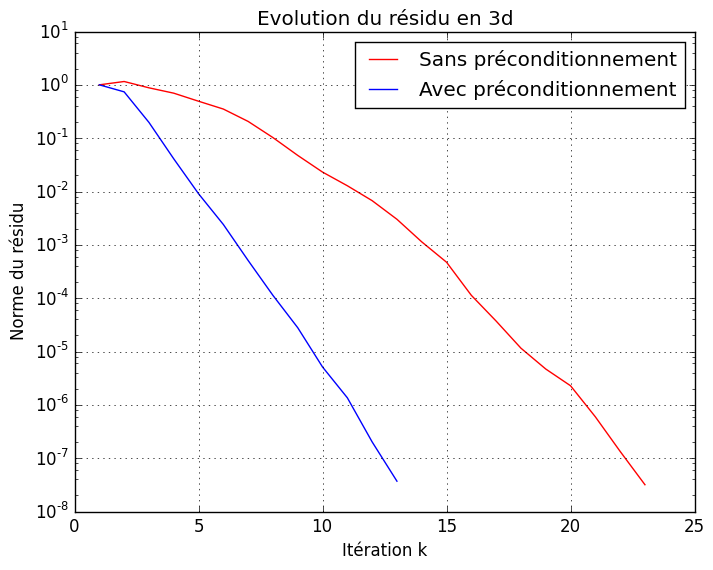

In [46]:
n=10;
A=Laplace3d(n,n,n);
b=ones(n^3);
h=1/(n+1);
wopt=2/(1+sin(pi*h));

(x,res1)=GradConj(A,b,zeros(b),epsilon); # Sans préconditionnement

init_Precond(wopt,A)
(x,res2)=GradConjPre(A,b,Precond_SSOR,zeros(b),epsilon); # Avec préconditionnement


using PyPlot

f=figure()
xlabel("Itération k")
ylabel("Norme du résidu")
title("Evolution du résidu en 3d")
semilogy(1:length(res1),res1,color="red")
semilogy(1:length(res2),res2,color="blue")
legend(["Sans préconditionnement";"Avec préconditionnement"])
grid("on")

## Interprétation :
Les trois graphiques tracés montrent la convergence des Laplace 1d 2d et 3d avec et sans préconditionement. Nous avons fixé epsilon à 10^-8 .

### Cas 1d :
Le premier graphique montre que dans le cas 1d, on a besoin de 500 itérations afin de pouvoir visualiser la convergence du gradient (résidus < epsilon) conjugé sans conditionnement contre une vingtaine pour le gradient conjugé avec conditionnement.   

### Cas 2d :
Le second graphique montre que dans le cas 2d, on a besoin de d'environ 170 itérations afin de pouvoir visualiser la convergence du gradient conjugé sans conditionnement contre 40 pour le gradient conjugé avec conditionnement.  
Ainsi on peu dire que le Laplace 2d n'est pas adéquat à ce système.

### Cas 3d :
Le premier graphique montre que dans le cas 3d, 14 itérations suffisent pour atteindre des résidus proches de notre epsilon pour le gradient conjugué avec préconditionnement, contre 24 itérations pour le gradient conjugué sans préconditionnement.


# Question 5 :
On va comparer les temps de résolution obtenus pour les différentes matrices et méthodes en fonction
des taille de matrice.

In [35]:
println("Laplace 1d ");
N1=[100,1000,10000,100000,1000000,10000000];
c1=zeros(length(N1));
c1bis=zeros(length(N1));
for i=1:length(N1)
    A=Laplace1d(N1[i]); 
    b=ones(N1[i]);
    wopt=2/(1+sin(pi/(N1[i]+1)));
    tic();
    A\b;
    c1[i]=toq();
    tic();
    init_Precond(wopt,A);
    (x,rr)=GradConjPre(A,b,Precond_SSOR,zeros(b),epsilon*N1[i]);
    c1bis[i]=toq();
end;

Laplace 1d 


In [36]:
println("Laplace 2d");
N2=[10,50,100,1000];
c2=zeros(length(N2));
c2bis=zeros(length(N2));
for i=1:length(N2)
    A=Laplace2d(N2[i],N2[i]);
    b=ones(N2[i].^2)
    wopt=2/(1+sin(pi/(N2[i]+1)));
    tic();
    A\b;
    c2[i]=toq();
    tic();
    init_Precond(wopt,A);
    (x,rr)=GradConjPre(A,b,Precond_SSOR,zeros(b),epsilon*N2[i]^2);
    c2bis[i]=toq();
end;


Laplace 2d


In [37]:
println("Laplace 3d");
N3=[5,10,20,30,50];
c3=zeros(length(N3));
c3bis=zeros(length(N3));
for i=1:length(N3)
    A=Laplace3d(N3[i],N3[i],N3[i]);
    b=ones(N3[i].^3)
    wopt=2/(1+sin(pi/(N3[i]+1)));
    tic();
    A\b;
    c3[i]=toq();
    tic();
    init_Precond(wopt,A);
    (x,rr)=GradConjPre(A,b,Precond_SSOR,zeros(b),epsilon*N3[i].^3);
    c3bis[i]=toq();
end;


Laplace 3d


### Sans préconditionnment :

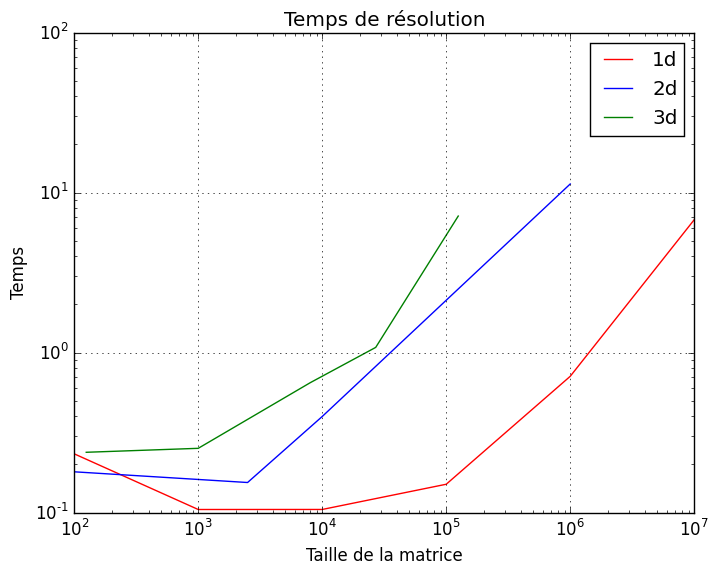

In [49]:
figure()
xlabel("Taille de la matrice")
ylabel("Temps")
title("Temps de résolution")
loglog(N1,c1,color="red")
loglog(N2.^2,c2,color="blue")
loglog(N3.^3,c3,color="green")
legend(["1d"; "2d" ;"3d"])
grid("on")

### Avec préconditionnelent :

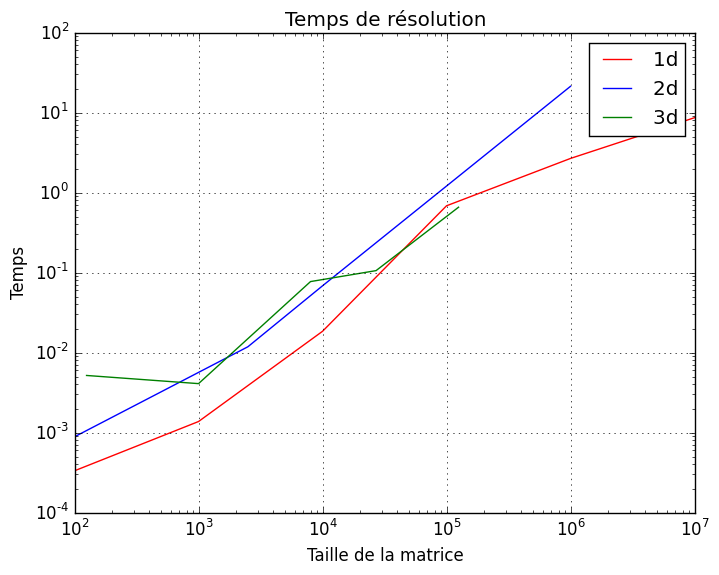

In [50]:
figure()
xlabel("Taille de la matrice")
ylabel("Temps")
title("Temps de résolution")
loglog(N1,c1bis,color="red")
loglog(N2.^2,c2bis,color="blue")
loglog(N3.^3,c3bis,color="green")
legend(["1d " ; "2d " ;"3d "])
grid("on")

## Question 6 : Bilan des Graphiques :
Les graphiques ci dessus nous montrent le temps de calcul nécéssaire par rapport à la taille de la matrice. En comparant les deux graphiques nous pouvons dire que le gradient avec préconditionnement nécéssite un peu plus de temps de calcul mais permet d'obtenir des résidus beaucoup plus petit. 


# Bibliographie :

\url{https://docs.julialang.org/en/release-0.4/stdlib/arrays/}

\url{https://docs.julialang.org/en/release-0.4/stdlib/linalg/}

Cours d'Analyse numérique II (N'ayant pas eu le temps de tout taper en $\LaTeX $, j'ai copier coler les formules directement) 